# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes the SAT math and verbal scores in the United States.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data does not look complete because no data is recorded for Nebraska.

##### 3. Create a data dictionary for the dataset.

In [155]:
data_dict = {}

for index, column_name in enumerate(header):
    data_dict[column_name] = []
    for row in data:
        data_dict[column_name].append(row[index])
print data_dict

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [160]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
rows = []

with open ('/Users/lesliepham/Desktop/sat_scores.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
        

##### 5. Print the data

In [150]:
for i in rows:
    print i

['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']
['RI', '71', '501', '499']
['PA', '71', '500', '499']
['VT', '69', '511', '506']
['ME', '69', '506', '500']
['VA', '68', '510', '501']
['DE', '67', '501', '499']
['MD', '65', '508', '510']
['NC', '65', '493', '499']
['GA', '63', '491', '489']
['IN', '60', '499', '501']
['SC', '57', '486', '488']
['DC', '56', '482', '474']
['OR', '55', '526', '526']
['FL', '54', '498', '499']
['WA', '53', '527', '527']
['TX', '53', '493', '499']
['HI', '52', '485', '515']
['AK', '51', '514', '510']
['CA', '51', '498', '517']
['AZ', '34', '523', '525']
['NV', '33', '509', '515']
['CO', '31', '539', '542']
['OH', '26', '534', '439']
['MT', '23', '539', '539']
['WV', '18', '527', '512']
['ID', '17', '543', '542']
['TN', '13', '562', '553']
['NM', '13', '551', '542']
['IL', '12', '576', '589']
['KY', '12', '550', '550']
['WY', '11', '547',

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [152]:
header = rows[0]
data = rows[1:]
print(header)

['State', 'Rate', 'Verbal', 'Math']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [64]:
State_Names = []
for states in data:
    State_Names.append(states[0])
print State_Names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [285]:
print type(State_Names)
print type(RateInt)
print type(VerbalInt)
print type(MathInt)

<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [253]:
RateInt = [int(i[1]) for i in data]
VerbalInt = [int(i[2]) for i in data]
MathInt = [int(i[3]) for i in data]
print RateInt
print VerbalInt
print MathInt

[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45]
[509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]
[510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514]


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [208]:
SAT = [(i[0], i[1:]) for i in data]
print SAT
 
SAT_data= {}
for key, value in SAT[:-1]:
   SAT_data[key] = value

[('CT', ['82', '509', '510']), ('NJ', ['81', '499', '513']), ('MA', ['79', '511', '515']), ('NY', ['77', '495', '505']), ('NH', ['72', '520', '516']), ('RI', ['71', '501', '499']), ('PA', ['71', '500', '499']), ('VT', ['69', '511', '506']), ('ME', ['69', '506', '500']), ('VA', ['68', '510', '501']), ('DE', ['67', '501', '499']), ('MD', ['65', '508', '510']), ('NC', ['65', '493', '499']), ('GA', ['63', '491', '489']), ('IN', ['60', '499', '501']), ('SC', ['57', '486', '488']), ('DC', ['56', '482', '474']), ('OR', ['55', '526', '526']), ('FL', ['54', '498', '499']), ('WA', ['53', '527', '527']), ('TX', ['53', '493', '499']), ('HI', ['52', '485', '515']), ('AK', ['51', '514', '510']), ('CA', ['51', '498', '517']), ('AZ', ['34', '523', '525']), ('NV', ['33', '509', '515']), ('CO', ['31', '539', '542']), ('OH', ['26', '534', '439']), ('MT', ['23', '539', '539']), ('WV', ['18', '527', '512']), ('ID', ['17', '543', '542']), ('TN', ['13', '562', '553']), ('NM', ['13', '551', '542']), ('IL', ['

##### 11. Create a dictionary with the values for each of the numeric columns

In [111]:
num_value = data_dict
del data_dict['State']
print num_value

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564'

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [220]:
values = []
for i in data:
    values.append(i[2])
print 'max value', max(values)
print 'min value', min(values)
    

max value 593
min value 482


In [229]:
rates = []
for i in data:
    rates.append(i[1])
print 'max rate', max(rates) #I'm not sure why this is printing the way it is...
print 'min rate' min(rates)

9
11


In [224]:
math = []
for i in data:
    math.append(i[3])
print 'max math', max(math)
print 'min math', min(math)

max math 603
min math 439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [297]:
y = RateInt
def AVG(y):
    return sum(y)*1.0/len(x)
avg = AVG(y)
variance = map(lambda x: (x - avg)**2, y)
AVG(variance)
import math
STD= math.sqrt(AVG(variance))
print STD

10.1254554687


In [298]:
z = MathInt
def AVG(z):
    return sum(z)*1.0/len(x)
avg = AVG(z)
variance = map(lambda x: (x - avg)**2, z)
AVG(variance)
import math
STD= math.sqrt(AVG(variance))
print STD

115.185722129


In [299]:
w = VerbalInt
def AVG(w):
    return sum(w)*1.0/len(x)
avg = AVG(w)
variance = map(lambda x: (x - avg)**2, w)
AVG(variance)
import math
STD= math.sqrt(AVG(variance))
print STD

115.255120779


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

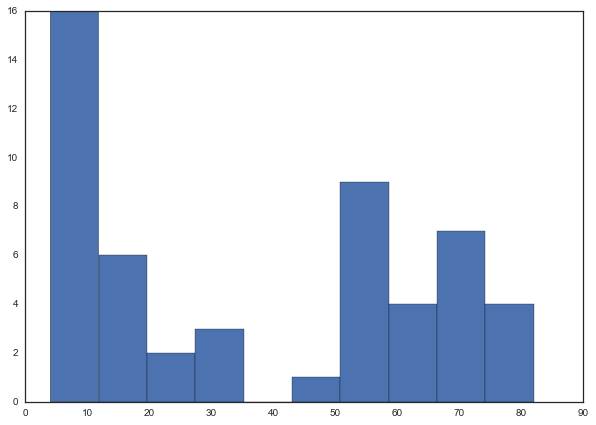

In [254]:
import scipy as sp
sp.stats.skew(RateInt)
plt.hist(RateInt, bins = 10)
plt.show()

##### 15. Plot the Math distribution

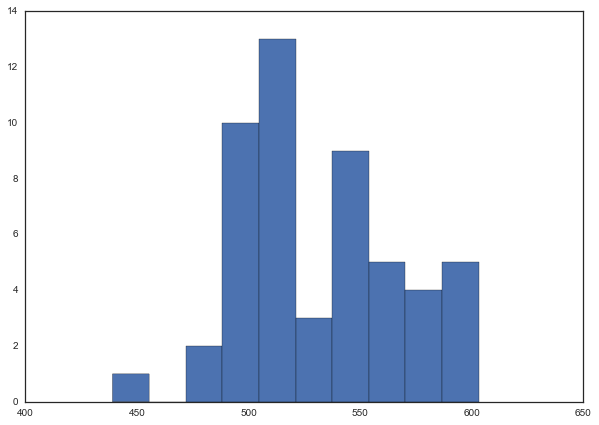

In [255]:
import scipy as sp
sp.stats.skew(MathInt)
plt.hist(MathInt, bins = 10)
plt.show()

##### 16. Plot the Verbal distribution

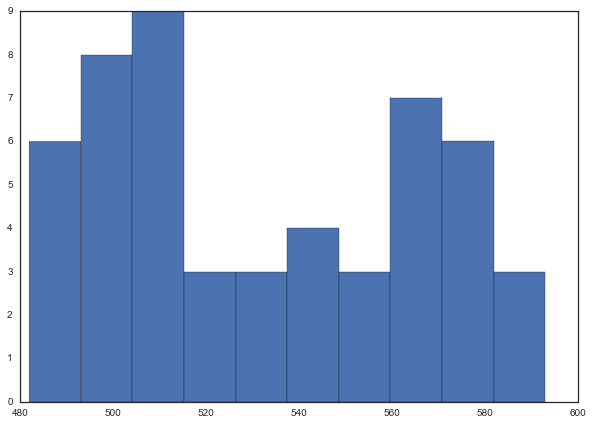

In [259]:
import scipy as sp
sp.stats.skew(VerbalInt)
plt.hist(VerbalInt, bins = 10)
plt.show()

##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution is a bell curve where most the data taken in the survey is centralized around a range. The more centralized the range is the more credible the data is.

##### 18. Does that distribution hold true for our data?

I don't believe this assumption about data distribution holds true with our data because the results are prettu diverse by location. It is too random of a distribution to make any valid conclusion from it.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

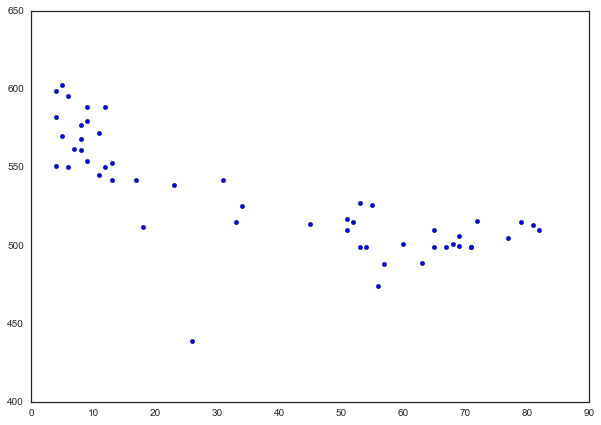

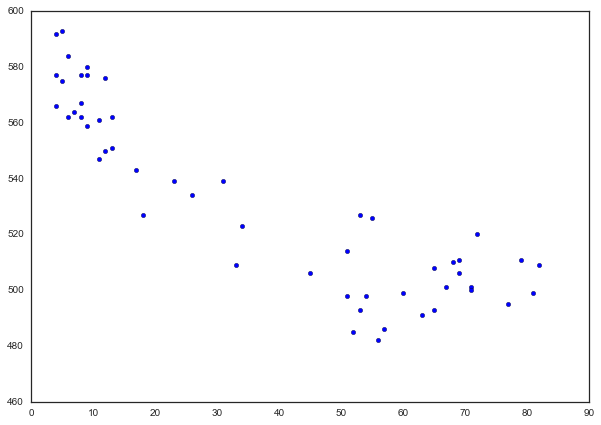

In [271]:
plt.scatter(RateInt, MathInt) #Rate is the x-axis, Math is the y-axis
plt.show()

plt.scatter(RateInt, VerbalInt)#Rate is the x-axis, Verbal is the y-axis
plt.show()

##### 20. Are there any interesting relationships to note?

Both plots show that the higher the rate, the lower the math/verbal score. The correlation is more prominent in the Rate vs Verbal plot. 

##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x11bd11490>],
 'caps': [<matplotlib.lines.Line2D at 0x11bd2a750>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bd02a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bd02410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11bd11a90>,
  <matplotlib.lines.Line2D at 0x11bd2a110>]}

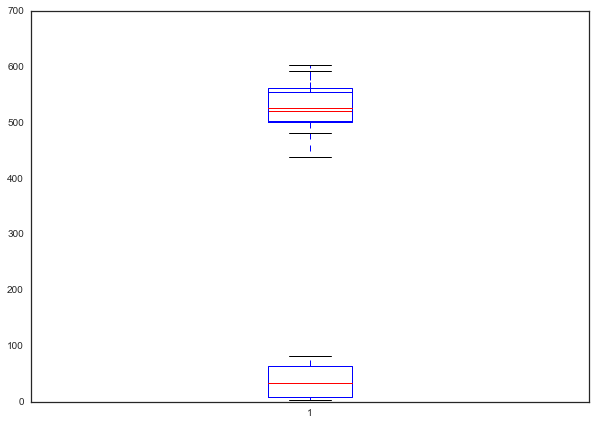

In [279]:
plt.boxplot(RateInt)
plt.boxplot(MathInt)
plt.boxplot(VerbalInt)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 